In [117]:
import pandas as pd

import os
from functools import reduce
from itertools import combinations
import json
from collections import defaultdict

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import yaml

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
from scipy.spatial import distance
from scipy.stats.stats import pearsonr   


In [323]:
# Norwegian, Swedish, Danish, Icelandic, Faroese, Finnish, Estonian, Latvian, Lithuanian, Greenlandic
lang_clics_list = [ "nob", "swe", "dan", "isl", "fin", "lav", "lit", "kal"]

lang_wn_list = [ "swe", "dan", "isl", "fin", "est", "lav", "lit", "kal" ]

In [325]:
len(lang_clics_list)

8

In [326]:
language_dict={"nob":"Norwegian", "swe":"Swedish","dan": "Danish","isl": "Icelandic", "fin":"Finnish", "est":"Estonian", "lav":"Latvian", 
               "lit":"Lithuanian", "kal":"Greenlandic"}

In [346]:
wn_vectors["kal"]

array([[-1., -1., -1.,  1., -1., -1., -1., -1.,  2.,  1.,  0.,  1., -1.]])

In [347]:
wn_vectors["fin"]

array([[ 0.,  0., -1.,  0., -1., -1., -1., -1.,  1.,  1.,  0.,  0.,  1.]])

In [348]:
wn_vectors["lit"]

array([[ 1.,  0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  2.]])

In [349]:
wn_vectors["lav"]

array([[-1., -1., -1.,  0., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [350]:
wn_vectors["isl"]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [351]:
wn_vectors["est"]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [352]:
wn_vectors["dan"]

array([[ 0.,  0., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [353]:
wn_vectors["deu"]

array([[ 0.,  0., -1.,  0.,  6.,  4.,  1.,  0.,  1.,  1.,  0.,  0.,  1.]])

In [354]:
wn_vectors["eng"]

array([[ 0.,  0., -1.,  0.,  6.,  4.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]])

In [356]:
wn_vectors["swe"]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [327]:
df_distance_clics_langs = df_distance_clics[df_distance_clics["ISO1"].isin(lang_clics_list)][df_distance_clics["ISO2"].isin(lang_clics_list)]
df_distance_wn_langs = df_distance_wn[df_distance_wn["ISO1"].isin(lang_wn_list)][df_distance_wn["ISO2"].isin(lang_wn_list)]

/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/3816426006.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_distance_clics_langs = df_distance_clics[df_distance_clics["ISO1"].isin(lang_clics_list)][df_distance_clics["ISO2"].isin(lang_clics_list)]
/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/3816426006.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_distance_wn_langs = df_distance_wn[df_distance_wn["ISO1"].isin(lang_wn_list)][df_distance_wn["ISO2"].isin(lang_wn_list)]


In [328]:
len(df_distance_wn_langs)

28

In [329]:
df_distance_wn_langs["Language Pair"]= df_distance_wn_langs["ISO1"]+"-"+df_distance_wn_langs["ISO2"]

In [330]:
df_distance_wn_langs.rename(columns={"ISO1":"Language1", "ISO2":"Language2", "feature_distance":"WALS Feature", "lang_distance_wn": "WordNet", "lang_distance_wn_concept":"WordNet Concept"}, inplace=True)

In [331]:
df_distance_wn_langs_ = df_distance_wn_langs[["Language Pair", "WALS Feature", "WordNet", "WordNet Concept"]]

In [332]:
df_distance_wn_langs_.index = df_distance_wn_langs_["Language Pair"]

In [334]:
df_distance_wn_langs

,Language1,Language2,WALS Feature,WordNet,WordNet Concept,Language Pair
1518,isl,kal,0.071611,0.157230,-0.060477,isl-kal
1534,est,kal,0.071611,0.192219,0.090950,est-kal
1629,fin,kal,0.639010,-0.062563,0.065486,fin-kal
1648,kal,lav,0.149071,0.222072,0.143123,kal-lav
1656,kal,lit,-0.200000,0.211941,0.066888,kal-lit
1657,kal,swe,0.071611,0.164336,0.156218,kal-swe
1666,dan,kal,0.077850,0.203156,0.143231,dan-kal
8184,est,isl,1.000000,0.678645,0.562373,est-isl
8279,fin,isl,0.392232,0.134833,0.152206,fin-isl
8298,isl,lav,0.960769,0.502366,0.495860,isl-lav


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'isl-kal'),
  Text(1, 0, 'est-kal'),
  Text(2, 0, 'fin-kal'),
  Text(3, 0, 'kal-lav'),
  Text(4, 0, 'kal-lit'),
  Text(5, 0, 'kal-swe'),
  Text(6, 0, 'dan-kal'),
  Text(7, 0, 'est-isl'),
  Text(8, 0, 'fin-isl'),
  Text(9, 0, 'isl-lav'),
  Text(10, 0, 'isl-lit'),
  Text(11, 0, 'isl-swe'),
  Text(12, 0, 'dan-isl'),
  Text(13, 0, 'est-fin'),
  Text(14, 0, 'est-lav'),
  Text(15, 0, 'est-lit'),
  Text(16, 0, 'est-swe'),
  Text(17, 0, 'dan-est'),
  Text(18, 0, 'fin-lav'),
  Text(19, 0, 'fin-lit'),
  Text(20, 0, 'fin-swe'),
  Text(21, 0, 'dan-fin'),
  Text(22, 0, 'lav-lit'),
  Text(23, 0, 'lav-swe'),
  Text(24, 0, 'dan-lav'),
  Text(25, 0, 'lit-swe'),
  Text(26, 0, 'dan-lit'),
  Text(27, 0, 'dan-swe')])

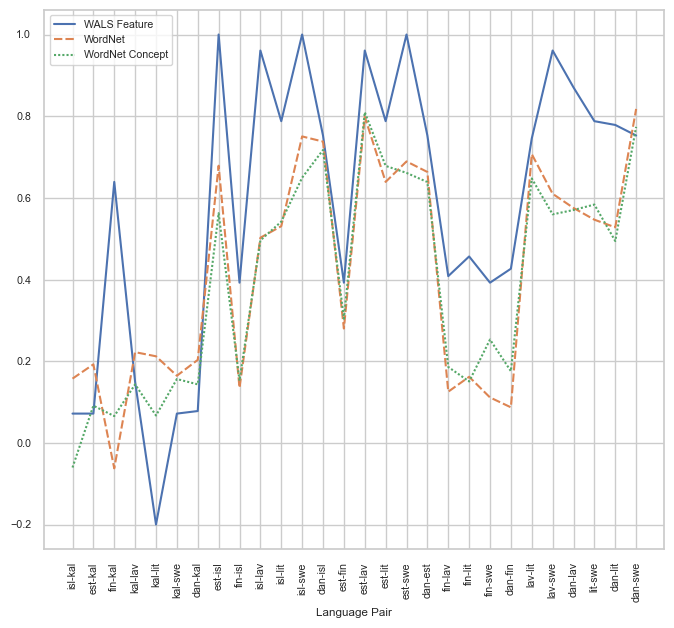

In [335]:
plt.figure(figsize=(8,7))
sns.set_theme(style="whitegrid", font_scale=0.7)
sns.lineplot(data=df_distance_wn_langs_) 
plt.xticks(rotation=90)

In [337]:
df_distance_wn_langs

,Language1,Language2,WALS Feature,WordNet,WordNet Concept,Language Pair
1518,isl,kal,0.071611,0.157230,-0.060477,isl-kal
1534,est,kal,0.071611,0.192219,0.090950,est-kal
1629,fin,kal,0.639010,-0.062563,0.065486,fin-kal
1648,kal,lav,0.149071,0.222072,0.143123,kal-lav
1656,kal,lit,-0.200000,0.211941,0.066888,kal-lit
1657,kal,swe,0.071611,0.164336,0.156218,kal-swe
1666,dan,kal,0.077850,0.203156,0.143231,dan-kal
8184,est,isl,1.000000,0.678645,0.562373,est-isl
8279,fin,isl,0.392232,0.134833,0.152206,fin-isl
8298,isl,lav,0.960769,0.502366,0.495860,isl-lav


In [338]:
wn_corr= df_distance_wn_langs["WALS Feature"].corr(df_distance_wn_langs["WordNet"])
wn_corr

0.7679529144136179

In [339]:
df_distance_wn_langs["WALS Feature"].corr(df_distance_wn_langs["WordNet Concept"])

0.851510432162816

In [237]:
df_distance_wn_langs_feature = df_distance_wn_langs[["Language1","Language2", "WALS Feature"]].pivot("Language1","Language2", "WALS Feature").T

/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/460351142.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_distance_wn_langs_feature = df_distance_wn_langs[["Language1","Language2", "WALS Feature"]].pivot("Language1","Language2", "WALS Feature").T


In [238]:
df_distance_wn_langs_feature

Language1,Danish,Estonian,Finnish,Greenlandic,Icelandic,Latvian,Lithuanian
Language2,,,,,,,
Estonian,0.752618,NaN,NaN,NaN,NaN,NaN,NaN
Finnish,0.426401,0.392232,NaN,NaN,NaN,NaN,NaN
Greenlandic,0.077850,0.071611,0.639010,NaN,0.071611,NaN,NaN
Icelandic,0.752618,1.000000,0.392232,NaN,NaN,NaN,NaN
Latvian,0.870388,0.960769,0.408248,0.149071,0.960769,NaN,NaN
Lithuanian,0.778499,0.787726,0.456435,-0.200000,0.787726,0.745356,NaN
Swedish,0.752618,1.000000,0.392232,0.071611,1.000000,0.960769,0.787726


In [241]:
sns.set_theme(style="whitegrid", font_scale=1)


In [275]:
plt.figure(figsize=(8,7))
plt.title("Lexicon Typological Feature Distance", fontsize=12)

sns.heatmap(df_distance_wn_langs_feature)
plt.xticks(rotation=45)
plt.savefig("../output/wn_feature.png")
plt.clf()

<Figure size 800x700 with 0 Axes>

In [247]:
df_distance_wn_langs

,Language1,Language2,WALS Feature,WordNet,WordNet Concept,Language Pair
1518,Icelandic,Greenlandic,0.071611,0.157230,-0.060477,Icelandic-Greenlandic
1534,Estonian,Greenlandic,0.071611,0.192219,0.090950,Estonian-Greenlandic
1629,Finnish,Greenlandic,0.639010,-0.062563,0.065486,Finnish-Greenlandic
1648,Greenlandic,Latvian,0.149071,0.222072,0.143123,Greenlandic-Latvian
1656,Greenlandic,Lithuanian,-0.200000,0.211941,0.066888,Greenlandic-Lithuanian
1657,Greenlandic,Swedish,0.071611,0.164336,0.156218,Greenlandic-Swedish
1666,Danish,Greenlandic,0.077850,0.203156,0.143231,Danish-Greenlandic
8184,Estonian,Icelandic,1.000000,0.678645,0.562373,Estonian-Icelandic
8279,Finnish,Icelandic,0.392232,0.134833,0.152206,Finnish-Icelandic
8298,Icelandic,Latvian,0.960769,0.502366,0.495860,Icelandic-Latvian


In [261]:
from matplotlib import rcParams


In [273]:
df_distance_wn_langs_wn_emb = df_distance_wn_langs[["Language1","Language2", "WordNet"]].pivot("Language1","Language2", "WordNet").T

plt.figure(figsize=(8,7))
plt.title("WordNet Language Embeddings Distance", fontsize=12)
sns.heatmap(df_distance_wn_langs_wn_emb)
plt.xticks(rotation=45)

plt.savefig("../output/wn_wn.png")
plt.clf()

/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/1804542485.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_distance_wn_langs_wn_emb = df_distance_wn_langs[["Language1","Language2", "WordNet"]].pivot("Language1","Language2", "WordNet").T


<Figure size 800x700 with 0 Axes>

/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/1255372727.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_distance_wn_langs_wn_concept_emb = df_distance_wn_langs[["Language1","Language2", "WordNet Concept"]].pivot("Language1","Language2", "WordNet Concept").T


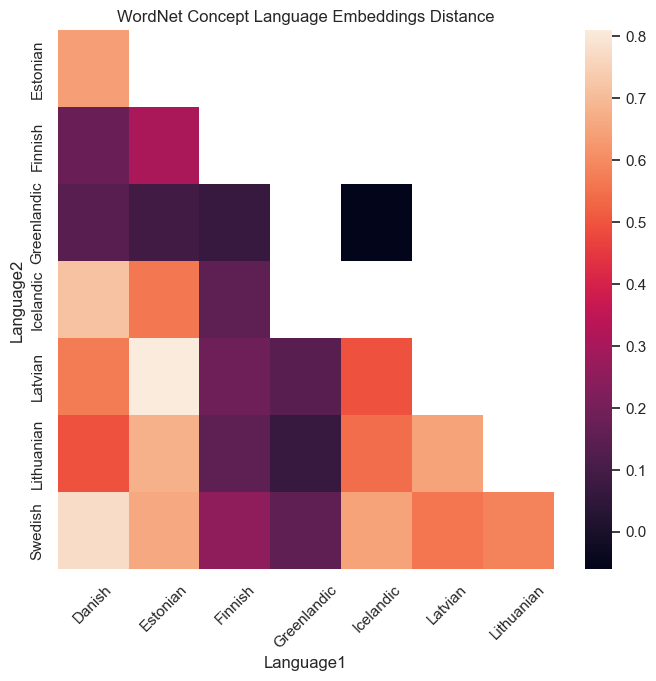

In [276]:

df_distance_wn_langs_wn_concept_emb = df_distance_wn_langs[["Language1","Language2", "WordNet Concept"]].pivot("Language1","Language2", "WordNet Concept").T
plt.figure(figsize=(8,7))

plt.title("WordNet Concept Language Embeddings Distance", fontsize=12)
sns.heatmap(df_distance_wn_langs_wn_concept_emb)
plt.xticks(rotation=45)

plt.savefig("../output/wn_concept.png")

In [202]:
glue.pivot("Model", "Task", "Score")

/var/folders/n4/_229c3094s1blstjbm14zsdw0000gn/T/ipykernel_99938/1894887983.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue.pivot("Model", "Task", "Score")


Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


#### PEARSONR Correlation

In [340]:
len(df_distance_clics_langs), len(df_distance_wn_langs)

(28, 28)

In [176]:
pearsonr(df_distance_clics_langs["feature_distance"].to_numpy(), df_distance_clics_langs["lang_distance_clics"].to_numpy())

(-0.08762171443909288, 0.657500916361288)

In [175]:
pearsonr(df_distance_wn_langs["feature_distance"].to_numpy(), df_distance_wn_langs["lang_distance_wn"].to_numpy())

(0.7679529144136176, 1.8379018907908466e-06)

In [177]:
pearsonr(df_distance_wn_langs["feature_distance"].to_numpy(), df_distance_wn_langs["lang_distance_wn_concept"].to_numpy())

(0.8515104321628155, 9.210179109334634e-09)

In [283]:
len(df_distance_wn_langs)

28

In [341]:
pearsonr(df_distance_clics_langs["feature_distance"].to_numpy(), df_distance_clics_langs["lang_distance_clics"].to_numpy())

(-0.08762171443909288, 0.657500916361288)

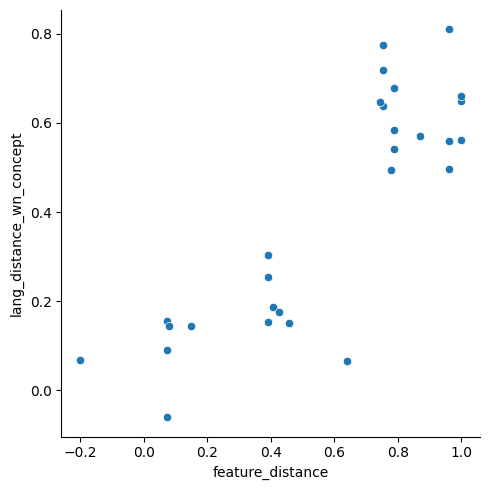

In [178]:
sns.relplot(data=df_distance_wn_langs, x="feature_distance", y="lang_distance_wn_concept")


In [285]:
len(df_distance_wn), len(df_distance_clics)

(23220, 58653)

In [120]:
pearsonr(df_distance_wn["feature_distance"].to_numpy(), df_distance_wn["lang_distance_wn_concept"].to_numpy())

(0.12738740745223426, 1.3391396605461284e-84)

In [122]:
pearsonr(df_distance_clics["feature_distance"].to_numpy(), df_distance_clics["lang_distance_clics"].to_numpy())

(-0.04944400661933561, 4.436179249654731e-33)

In [277]:
pearsonr(df_distance_wn["feature_distance"].to_numpy(), df_distance_wn["lang_distance_wn"].to_numpy())

(0.14690955526320498, 3.524768247444803e-112)

In [286]:
len(wn_vectors)

216

In [287]:
len(clics_vectors)

343

In [355]:
df_distance_wn

,ISO1,ISO2,feature_distance,lang_distance_wn,lang_distance_wn_concept
0,eng,kat,-0.400892,-0.120365,0.089329
1,eng,lez,-0.519701,-0.084671,-0.030571
2,eng,evn,-0.489979,-0.073993,0.014623
3,abk,eng,-0.519701,-0.087824,-0.050268
4,arz,eng,-0.505076,-0.045466,-0.004394
...,...,...,...,...,...
23215,kum,rmy,0.678401,0.956402,0.971392
23216,rmy,tsn,0.904534,0.941226,0.948909
23217,kmr,kum,0.783349,0.786085,0.754341
23218,kmr,tsn,0.870388,0.796016,0.763995


In [ ]:
df_distance_clics_ = df_distance_clics

In [292]:
fids = ["129A", "130A", "130B", "131A", "132A", "133A", "134A", "135A", "136A", "136B","137A", "137B", "138A"]

In [293]:
len(fids)

13

In [27]:
with open("../data/TypPred/wals_features.yaml") as f:
    features = yaml.load(f, Loader)["Lexicon"]

In [294]:
feature_names = list(features.values())
feature_names

['Hand_and_Arm',
 'Finger_and_Hand',
 "Cultural_Categories_of_Languages_with_Identity_of_'Finger'_and_'Hand'",
 'Numeral_Bases',
 'Number_of_Non-Derived_Basic_Colour_Categories',
 'Number_of_Basic_Colour_Categories',
 'Green_and_Blue',
 'Red_and_Yellow',
 'M-T_Pronouns',
 'M_in_First_Person_Singular',
 'N-M_Pronouns',
 'M_in_Second_Person_Singular',
 'Tea']

In [295]:
len(feature_names)

13

In [296]:
data_dir = "../data/TypPred/datasets/"

train_file = os.path.join(data_dir, f"train_dev.csv")
test_file = os.path.join(data_dir, f"test.csv")
train = pd.read_csv(train_file)
test= pd.read_csv(test_file)

df_train_test = pd.concat([train,test], axis=0)



In [297]:
len(df_train_test)

2371

In [298]:
df_lexicon = df_train_test[["ISO"]+feature_names]

In [299]:
df_lexicon = df_lexicon.dropna(subset=feature_names, axis=0, how="all")

In [300]:
df_lexicon.to_csv(os.path.join(data_dir, "lexicon.csv"), index=False)

In [301]:
len(df_lexicon)

888

In [5]:
# clics_prone_concat+max
# wn_glove_add+avg
# wn+concept_glove_concat+avg

In [302]:
with open("../data/TypPred/wals+clics_langs.json") as f:
          clics_langs = json.load(f)

In [303]:
with open("../data/TypPred/wals+wn_langs.json") as f:
          wn_langs = json.load(f)

In [304]:
df_clics = df_lexicon[df_lexicon["ISO"].isin(clics_langs)]
df_clics = df_clics.fillna(-1)

In [305]:
clics_vectors={}
for lang in df_clics["ISO"].tolist():
    lang_vector = df_clics[df_clics["ISO"]==lang][feature_names].to_numpy()
    clics_vectors[lang] = lang_vector

In [306]:
len(df_clics)

343

In [307]:
clics_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/concat+max", "clics_prone_embeddings" ), binary=False)


In [308]:
langs_clics = df_clics["ISO"].tolist()
lang1_ls =[]
lang2_ls =[]

feature_distances_clics = []
lang_distances_clics =[]

for comb in combinations(langs_clics,2 ):
    comb = sorted(comb)
    l1, l2 = comb
    lang1_ls.append(l1)
    lang2_ls.append(l2)
    
    feature_distance = cosine_similarity(clics_vectors[l1], clics_vectors[l2])[0][0]
    lang_distances_clics_ = cosine_similarity(clics_embeddings[l1].reshape(1,-1), clics_embeddings[l2].reshape(1,-1))[0][0]
    
    feature_distances_clics.append(feature_distance)
    lang_distances_clics.append(lang_distances_clics_)
    

In [309]:
df_distance_clics = pd.DataFrame.from_dict({"ISO1":lang1_ls, "ISO2":lang2_ls, "feature_distance":feature_distances_clics, "lang_distance_clics":lang_distances_clics})


In [310]:
df_distance_clics.to_csv("../output/distance_clics.csv", index=False)

In [311]:
len(wn_langs)

330

In [312]:
df_wn = df_lexicon[df_lexicon["ISO"].isin(wn_langs)]

In [313]:
df_wn = df_wn.fillna(-1)

In [314]:
wn_vectors={}
for lang in df_wn["ISO"].tolist():
    lang_vector = df_wn[df_wn["ISO"]==lang][feature_names].to_numpy()
    wn_vectors[lang] = lang_vector

In [315]:
cosine_similarity(wn_vectors["eng"], wn_vectors["deu"])

array([[0.99118926]])

In [316]:
cosine_similarity(wn_vectors["eng"], wn_vectors["nld"])

array([[-0.40291148]])

In [317]:
cosine_similarity(wn_embeddings["eng"].reshape(1,-1), wn_embeddings["nld"].reshape(1,-1))

array([[0.18974231]], dtype=float32)

In [318]:
# wn_glove_add+avg
# wn+concept_glove_concat+avg
wn_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/add+avg", "wn_glove_embeddings" ), binary=False)
wn_concept_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/concat+avg", "wn_concept_glove_embeddings" ), binary=False)

In [319]:
langs_wn = df_wn["ISO"].tolist()
lang1_ls =[]
lang2_ls =[]

feature_distances_wn = []
lang_distances_wn =[]
lang_distances_wn_concept= []

for comb in combinations(langs_wn,2 ):
    comb = sorted(comb)
    l1, l2 = comb
    lang1_ls.append(l1)
    lang2_ls.append(l2)
    
#     feature_distance = distance.cosine(wn_vectors[l1], wn_vectors[l2])
#     lang_distances_wn_ = distance.cosine(wn_embeddings[l1].reshape(1,-1), wn_embeddings[l2].reshape(1,-1))
#     lang_distances_wn_concept_ = distance.cosine(wn_concept_embeddings[l1].reshape(1,-1), wn_concept_embeddings[l2].reshape(1,-1))
    
    feature_distance = cosine_similarity(wn_vectors[l1], wn_vectors[l2])[0][0]
    lang_distances_wn_ = cosine_similarity(wn_embeddings[l1].reshape(1,-1), wn_embeddings[l2].reshape(1,-1))[0][0]
    lang_distances_wn_concept_ = cosine_similarity(wn_concept_embeddings[l1].reshape(1,-1), wn_concept_embeddings[l2].reshape(1,-1))[0][0]
    feature_distances_wn.append(feature_distance)
    lang_distances_wn.append(lang_distances_wn_)
    lang_distances_wn_concept.append(lang_distances_wn_concept_)

In [320]:
df_distance_wn = pd.DataFrame.from_dict({"ISO1":lang1_ls, "ISO2":lang2_ls, "feature_distance":feature_distances_wn, "lang_distance_wn":lang_distances_wn, "lang_distance_wn_concept":lang_distances_wn_concept})
df_distance_wn

,ISO1,ISO2,feature_distance,lang_distance_wn,lang_distance_wn_concept
0,eng,kat,-0.400892,-0.120365,0.089329
1,eng,lez,-0.519701,-0.084671,-0.030571
2,eng,evn,-0.489979,-0.073993,0.014623
3,abk,eng,-0.519701,-0.087824,-0.050268
4,arz,eng,-0.505076,-0.045466,-0.004394
...,...,...,...,...,...
23215,kum,rmy,0.678401,0.956402,0.971392
23216,rmy,tsn,0.904534,0.941226,0.948909
23217,kmr,kum,0.783349,0.786085,0.754341
23218,kmr,tsn,0.870388,0.796016,0.763995


In [99]:
df_distance_wn = pd.DataFrame.from_dict({"ISO1":lang1_ls, "ISO2":lang2_ls, "feature_distance":feature_distances_wn, "lang_distance_wn":lang_distances_wn, "lang_distance_wn_concept":lang_distances_wn_concept})
df_distance_wn

,ISO1,ISO2,feature_distance,lang_distance_wn,lang_distance_wn_concept
0,eng,kat,-0.400892,-0.120365,0.089329
1,eng,lez,-0.519701,-0.084671,-0.030571
2,eng,evn,-0.489979,-0.073993,0.014623
3,abk,eng,-0.519701,-0.087824,-0.050268
4,arz,eng,-0.505076,-0.045466,-0.004394
...,...,...,...,...,...
23215,kum,rmy,0.678401,0.956402,0.971392
23216,rmy,tsn,0.904534,0.941226,0.948909
23217,kmr,kum,0.783349,0.786085,0.754341
23218,kmr,tsn,0.870388,0.796016,0.763995


In [321]:
df_distance_wn.to_csv("../output/distance_wn.csv", index=False)